In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


In [2]:
# Load datasets
train_ds = pd.read_csv('./resources/train.csv')
clean_ds = pd.read_csv('./resources/credit_score_cleaned_train.csv')

/var/folders/0g/m_btl88n5hs7w95j59p7v2180000gn/T/ipykernel_17870/3337449085.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_ds = pd.read_csv('./resources/train.csv')


In [3]:
# Exploratory data analysis and basic cleaning
print("Train Dataset Credit Score Counts:\n", train_ds['Credit_Score'].value_counts())
print("Clean Dataset Overview:")
print(clean_ds.info())
print("Credit Score Value Counts:\n", clean_ds['credit_score'].value_counts())

Train Dataset Credit Score Counts:
 Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Clean Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_

In [4]:
clean_ds

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,26.822620,265,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.944960,266,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,28.609352,267,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.377861,268,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,24.797346,269,No,41.420155,High_spent_Medium_value_payments,341.48923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,34.663570,378,No,60.971333,High_spent_Large_value_payments,479.86624,0
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,40.565630,379,No,54.185950,High_spent_Medium_value_payments,496.65160,0
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,41.255524,380,No,24.028477,High_spent_Large_value_payments,516.80910,0
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,33.638206,381,No,251.672580,Low_spent_Large_value_payments,319.16498,1


In [5]:
clean_ds['credit_score'].value_counts()

credit_score
1    53174
0    28998
2    17828
Name: count, dtype: int64

In [6]:
clean_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_credit_card           100000 non-null  int64  
 12  interest_rate             100000 non-null  int64  
 13  num_of_loan               100000 non-null  in

In [7]:
clean_ds

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,26.822620,265,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.944960,266,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,28.609352,267,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.377861,268,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,24.797346,269,No,41.420155,High_spent_Medium_value_payments,341.48923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,34.663570,378,No,60.971333,High_spent_Large_value_payments,479.86624,0
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,40.565630,379,No,54.185950,High_spent_Medium_value_payments,496.65160,0
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,41.255524,380,No,24.028477,High_spent_Large_value_payments,516.80910,0
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,33.638206,381,No,251.672580,Low_spent_Large_value_payments,319.16498,1


In [8]:
# Drop unnecessary columns
clean_ds = clean_ds.drop([
    "id", "customer_id", "name", "ssn", "type_of_loan"], axis=1)

In [9]:
clean_ds

,month,age,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,January,23,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,...,4,Good,809.98,26.822620,265,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,February,23,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,...,4,Good,809.98,31.944960,266,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,March,23,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,...,4,Good,809.98,28.609352,267,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,April,23,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,...,4,Good,809.98,31.377861,268,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,May,23,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,...,4,Good,809.98,24.797346,269,No,41.420155,High_spent_Medium_value_payments,341.48923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.4158,35.104023,4,6,7,2,...,3,Good,502.38,34.663570,378,No,60.971333,High_spent_Large_value_payments,479.86624,0
99996,May,25,Mechanic,39628.99,3359.4158,35.104023,4,6,7,2,...,3,Good,502.38,40.565630,379,No,54.185950,High_spent_Medium_value_payments,496.65160,0
99997,June,25,Mechanic,39628.99,3359.4158,35.104023,4,6,7,2,...,3,Good,502.38,41.255524,380,No,24.028477,High_spent_Large_value_payments,516.80910,0
99998,July,25,Mechanic,39628.99,3359.4158,35.104023,4,6,7,2,...,3,Good,502.38,33.638206,381,No,251.672580,Low_spent_Large_value_payments,319.16498,1


In [4]:
# Map month names to numeric values
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Map and handle NaNs by filling with a default value (e.g., 0) if needed
clean_ds['month'] = clean_ds['month'].map(month_mapping).fillna(0).astype(int)


In [11]:
clean_ds

,month,age,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,1,23,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,...,4,Good,809.98,26.822620,265,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,2,23,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,...,4,Good,809.98,31.944960,266,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,3,23,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,...,4,Good,809.98,28.609352,267,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,4,23,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,...,4,Good,809.98,31.377861,268,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,5,23,Scientist,19114.12,1824.8434,49.574947,3,4,3,4,...,4,Good,809.98,24.797346,269,No,41.420155,High_spent_Medium_value_payments,341.48923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25,Mechanic,39628.99,3359.4158,35.104023,4,6,7,2,...,3,Good,502.38,34.663570,378,No,60.971333,High_spent_Large_value_payments,479.86624,0
99996,5,25,Mechanic,39628.99,3359.4158,35.104023,4,6,7,2,...,3,Good,502.38,40.565630,379,No,54.185950,High_spent_Medium_value_payments,496.65160,0
99997,6,25,Mechanic,39628.99,3359.4158,35.104023,4,6,7,2,...,3,Good,502.38,41.255524,380,No,24.028477,High_spent_Large_value_payments,516.80910,0
99998,7,25,Mechanic,39628.99,3359.4158,35.104023,4,6,7,2,...,3,Good,502.38,33.638206,381,No,251.672580,Low_spent_Large_value_payments,319.16498,1


In [5]:
# Encode the target variable
label_encoder = LabelEncoder()
clean_ds['credit_score'] = label_encoder.fit_transform(clean_ds['credit_score'])

In [6]:
# One-Hot Encode 'Occupation' and Label Encode Other Categorical Features
# One-Hot Encode 'Occupation' and Label Encode Other Categorical Features
categorical_features = ['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']

# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# One-Hot Encoding 'Occupation' column
occupation_encoded = onehot_encoder.fit_transform(clean_ds[['occupation']])
occupation_df = pd.DataFrame(occupation_encoded, columns=onehot_encoder.get_feature_names_out(['occupation']))

# Label encode the other categorical features
clean_ds[categorical_features[1:]] = clean_ds[categorical_features[1:]].apply(lambda col: col.astype('category').cat.codes)

# Drop the original 'occupation' column and concatenate the one-hot encoded columns
clean_ds = pd.concat([clean_ds.drop(columns=['occupation']), occupation_df], axis=1)

# Check the result
print(clean_ds.head())

       id customer_id  month           name  age          ssn  annual_income  \
0  0x1602   CUS_0xd40      1  Aaron Maashoh   23  821-00-0265       19114.12   
1  0x1603   CUS_0xd40      2  Aaron Maashoh   23  821-00-0265       19114.12   
2  0x1604   CUS_0xd40      3  Aaron Maashoh   23  821-00-0265       19114.12   
3  0x1605   CUS_0xd40      4  Aaron Maashoh   23  821-00-0265       19114.12   
4  0x1606   CUS_0xd40      5  Aaron Maashoh   23  821-00-0265       19114.12   

   monthly_inhand_salary  total_emi_per_month  num_bank_accounts  ...  \
0              1824.8434            49.574947                  3  ...   
1              1824.8434            49.574947                  3  ...   
2              1824.8434            49.574947                  3  ...   
3              1824.8434            49.574947                  3  ...   
4              1824.8434            49.574947                  3  ...   

   occupation_Entrepreneur  occupation_Journalist  occupation_Lawyer  \
0       

In [3]:
clean_ds.drop(columns=['id', 'customer_id', 'name', 'ssn', 'type_of_loan'], inplace=True)
# clean_ds.drop(columns=['type_of_loan'], inplace=True)

In [4]:
# Separate features and target variable
X = clean_ds.drop('credit_score', axis=1)
y = clean_ds['credit_score']

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [28]:
# Encode categorical variables
#categorical_features = ['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']
#for col in categorical_features:
    #clean_ds[col] = clean_ds[col].astype('category').cat.codes
X_train


,month,age,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,occupation_Entrepreneur,occupation_Journalist,occupation_Lawyer,occupation_Manager,occupation_Mechanic,occupation_Media_Manager,occupation_Musician,occupation_Scientist,occupation_Teacher,occupation_Writer
18819,4,17,8953.055,807.0879,22.596985,3,10,30,5,23,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33358,7,34,60573.960,4868.8300,211.222930,6,10,34,7,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
80519,8,34,31302.340,2855.5283,77.326020,6,9,33,5,47,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87643,4,31,15628.590,1213.3824,21.271029,1,5,11,2,10,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72905,2,38,78443.480,6358.9565,177.387560,7,5,23,4,39,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84083,4,28,128847.000,10980.2500,197.039950,5,4,8,2,20,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3476,5,29,15762.720,1593.5600,40.982800,3,3,20,4,14,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37405,6,21,23809.460,1916.1217,85.011856,3,4,14,5,14,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88169,2,31,83618.960,6744.2466,326.167180,10,5,29,6,52,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Random Forest Classifier Setup

In [20]:
# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=78, n_estimators=128)
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=128, random_state=78)

In [21]:
# Evaluate the model
y_pred = clf.predict(X_test_scaled)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.82076
Precision Score: 0.821378540794315
Recall Score: 0.82076
F1 Score: 0.8209118492517917

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      7299
           1       0.84      0.82      0.83     13286
           2       0.78      0.80      0.79      4415

    accuracy                           0.82     25000
   macro avg       0.81      0.82      0.81     25000
weighted avg       0.82      0.82      0.82     25000



In [22]:
# Feature Importance Analysis
feature_importances = clf.feature_importances_
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)

In [23]:
# Display top 10 most important features
print("Top 10 Important Features:")
for importance, feature in importances_sorted[:10]:
    print(f"{feature}: {importance:.4f}")


Top 10 Important Features:
outstanding_debt: 0.0996
interest_rate: 0.0755
credit_mix: 0.0682
credit_history_age: 0.0614
delay_from_due_date: 0.0596
changed_credit_limit: 0.0550
monthly_balance: 0.0431
total_emi_per_month: 0.0418
num_credit_card: 0.0418
amount_invested_monthly: 0.0411


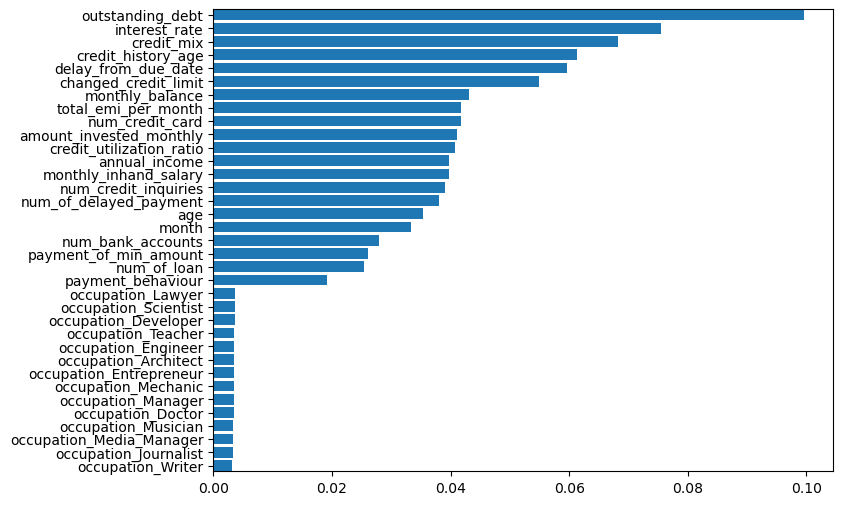

In [24]:
# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

Decision Tree Setup

In [25]:

# Decision Tree Model Initializztion and Fit
dt_clf = DecisionTreeClassifier(random_state=78, max_depth=10)
dt_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, random_state=78)

In [26]:
# Predict the Decision Tree model and Print Scores
y_pred_dt = dt_clf.predict(X_test_scaled)
print("Decision Tree Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Precision Score:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Decision Tree Recall Score:", recall_score(y_test, y_pred_dt, average='weighted'))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy Score: 0.7148
Decision Tree Precision Score: 0.7176635236967306
Decision Tree Recall Score: 0.7148
Decision Tree F1 Score: 0.7149706995494518

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.65      0.70      7299
           1       0.74      0.77      0.76     13286
           2       0.59      0.66      0.62      4415

    accuracy                           0.71     25000
   macro avg       0.69      0.69      0.69     25000
weighted avg       0.72      0.71      0.71     25000



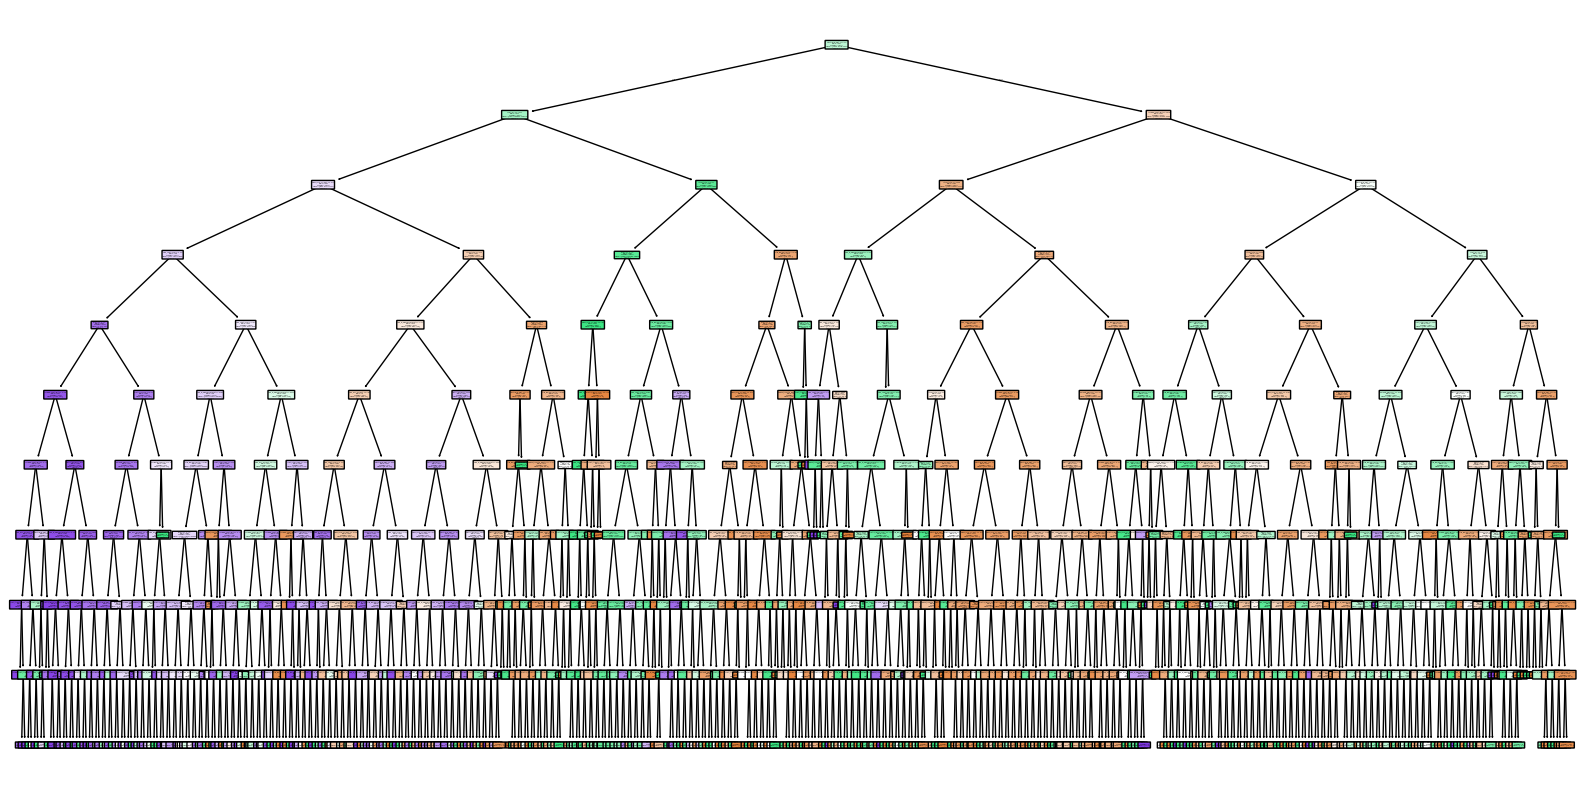

In [29]:
# Plot Decision Tree Features
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=X.columns, class_names=[str(cls) for cls in label_encoder.classes_], filled=True, rounded=True)
plt.show()

In [30]:
# Model Comparison
# compare the Decision Tree and Random Forest models, print the scores side-by-side:
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Random Forest': [accuracy_score(y_test, y_pred), 
                      precision_score(y_test, y_pred, average='weighted'), 
                      recall_score(y_test, y_pred, average='weighted'), 
                      f1_score(y_test, y_pred, average='weighted')],
    'Decision Tree': [accuracy_score(y_test, y_pred_dt), 
                      precision_score(y_test, y_pred_dt, average='weighted'), 
                      recall_score(y_test, y_pred_dt, average='weighted'), 
                      f1_score(y_test, y_pred_dt, average='weighted')]
})
print(metrics)

      Metric  Random Forest  Decision Tree
0   Accuracy       0.820760       0.714800
1  Precision       0.821379       0.717664
2     Recall       0.820760       0.714800
3   F1 Score       0.820912       0.714971


SVM Setup

In [6]:
# Initialize the SVM model with a linear kernel
svm_clf = SVC(kernel='linear')

In [ ]:
# Train Fit the model 
svm_clf.fit(X_train_scaled, y_train)

In [ ]:
# Make predictions
y_pred_svm = svm_clf.predict(X_test_scaled)

In [ ]:
# Print evaluation metrics
print("SVM Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("SVM Precision Score:", precision_score(y_test, y_pred_svm, average='weighted'))
print("SVM Recall Score:", recall_score(y_test, y_pred_svm, average='weighted'))
print("SVM F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

In [ ]:
# Create a comparison DataFrame for model evaluation metrics
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Random Forest': [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted')
    ],
    'Decision Tree': [
        accuracy_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_dt, average='weighted'),
        recall_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted')
    ],
    'SVM': [
        accuracy_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted')
    ]
})

# Display the comparison table
print(metrics)


In [ ]:
# Generate confusion matrices for each model
cm_rf = confusion_matrix(y_test, y_pred)         # Random Forest
cm_dt = confusion_matrix(y_test, y_pred_dt)      # Decision Tree
cm_svm = confusion_matrix(y_test, y_pred_svm)    # SVM

In [ ]:
# Plotting the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices for Random Forest, Decision Tree, and SVM")

In [ ]:
# Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("Random Forest")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

In [ ]:
# Decision Tree Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("Decision Tree")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

In [ ]:
# SVM Confusion Matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[2])
axes[2].set_title("SVM")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

In [ ]:
plt.tight_layout()
plt.show()
